# Workshop 2: Handwritten digit classification
In this workshop we will learn how to train a neural network with images 
as input to classify hand-written digits
([info of the data](http://yann.lecun.com/exdb/mnist/)). The main blocks of the workshop are:

1. Get the data from Keras repository and visualize it.
2. Pre-process the data.
3. Design the network.
4. Train the network.
5. Evaluate the model.

# 1. Get the data from Keras repository and visualize it.

In [1]:
# Import dependence to download the dataset
from tensorflow import keras
from keras.datasets import mnist

In [2]:
# The data, shuffled and split between train and testval sets
(X_train, y_train), (X_testval, y_testval) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Import dependence for handling arrays
import numpy as np

In [4]:
# Show the shape of the data partitions
print("X_train original shape:", X_train.shape)
print("y_train original shape:", y_train.shape)
print("X_testval original shape:", X_testval.shape)
print("y_testval original shape:", y_testval.shape)

X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_testval original shape: (10000, 28, 28)
y_testval original shape: (10000,)


In [5]:
# Show the data type of the data partitions
print("X_train original dtype:", X_train.dtype)
print("y_train original dytpe:", y_train.dtype)
print("X_testval original dtype:", X_testval.dtype)
print("y_testval original dtype:", y_testval.dtype)

X_train original dtype: uint8
y_train original dytpe: uint8
X_testval original dtype: uint8
y_testval original dtype: uint8


In [6]:
# Show the data range of the data partitions
print("X_train original min value:", X_train.min())
print("X_train original max value:", X_testval.max())
print("X_testval original min value:", X_train.min())
print("X_testval original max value:", X_testval.max())

X_train original min value: 0
X_train original max value: 255
X_testval original min value: 0
X_testval original max value: 255


In [7]:
# Show the different labels of the data partitions
print("y_train labels: \n", np.unique(y_train))
print("y_testval labels: \n", np.unique(y_testval))

y_train labels: 
 [0 1 2 3 4 5 6 7 8 9]
y_testval labels: 
 [0 1 2 3 4 5 6 7 8 9]


In [8]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for 
                                          # appropriate visualization

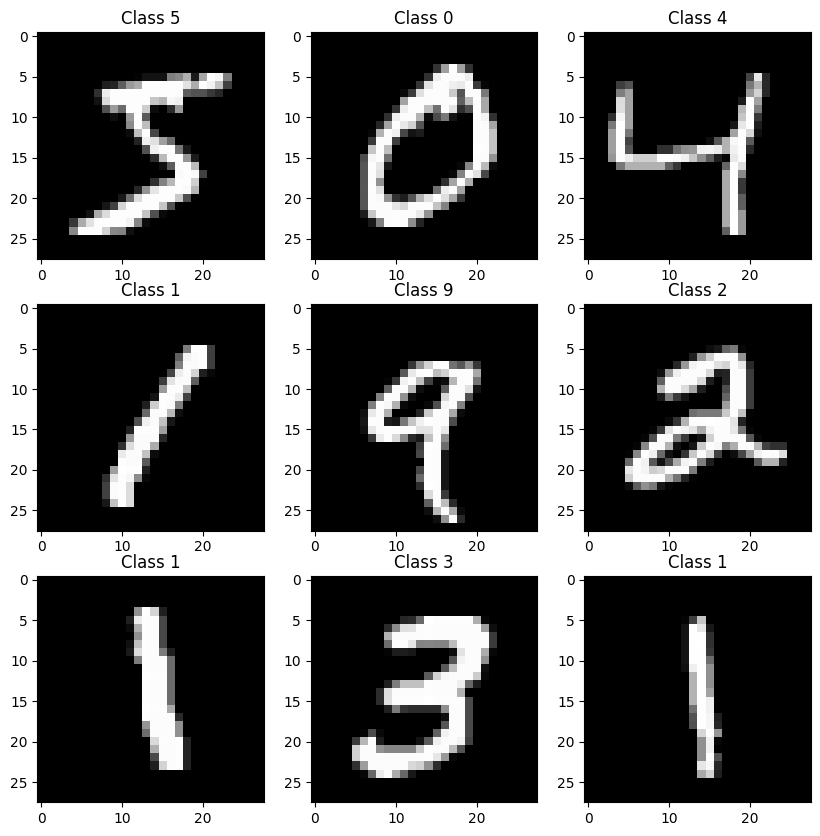

In [11]:
# Show 9 images with its respective ground truth labels
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# 2. Pre-process the data.


In [18]:
# Convert the 2D images to 1D array
X_train_rs = X_train.reshape(60000, 28*28)  # 784 = 28*28
X_testval_rs = X_testval.reshape(10000, 784)

In [19]:
# Show shape of the reshaped dataset
print("Training matrix shape:", X_train_rs.shape)
print("Testing matrix shape:", X_testval_rs.shape)

Training matrix shape: (60000, 784)
Testing matrix shape: (10000, 784)


Las redes neuronales no trabajan bien con valores enteros ni en el rango de 0 a 255, por ello se hacen los siguientes pasos para llevarlos al rango 0 1

In [20]:
# Convert dtype to float32
X_train_fl = X_train_rs.astype('float32')
X_testval_fl = X_testval_rs.astype('float32')

In [15]:
# Show dtype of the dataset
print("Training matrix dtype:", X_train_fl.dtype)
print("Testing matrix dtype:", X_testval_fl.dtype)

Training matrix dtype: float32
Testing matrix dtype: float32


In [16]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl /= 255
X_testval_fl /= 255

In [21]:
# Show the range of pixels
print("Training matrix range:", "[", X_train_fl.min(), ",", X_train_fl.max(), "]")
print("Testing matrix range:", "[", X_testval_fl.min(), ",", X_testval_fl.max(), "]")

Training matrix range: [ 0.0 , 255.0 ]
Testing matrix range: [ 0.0 , 255.0 ]


In [22]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [23]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(60000, 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(10000, 1)).toarray()

In [24]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (60000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [25]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [26]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 784)
Testing matrix shape: (5000, 784)


# 3. Design the network.


In [27]:
# Import dependencies for network dessign
from keras.models import Model
from keras.layers import Input, Dense

In [28]:
# Define the model
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer = Dense(32, activation='relu')(input_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [29]:
# Show a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

# 4. Train the network.


In [31]:
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
469/469 [==============================] - 7s 4ms/step - loss: 3.3522 - accuracy: 0.4243 - val_loss: 1.5160 - val_accuracy: 0.5592
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 1.0740 - accuracy: 0.6625 - val_loss: 1.0342 - val_accuracy: 0.6732
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7364 - accuracy: 0.7872 - val_loss: 0.7565 - val_accuracy: 0.8226
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5301 - accuracy: 0.8635 - val_loss: 0.6421 - val_accuracy: 0.8600
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4269 - accuracy: 0.8889 - val_loss: 0.5748 - val_accuracy: 0.8684
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3611 - accuracy: 0.9036 - val_loss: 0.4916 - val_accuracy: 0.8864
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3016 - accuracy: 0.9158 - val_loss: 0.4268 - val_accuracy: 0.9008
Epoch 

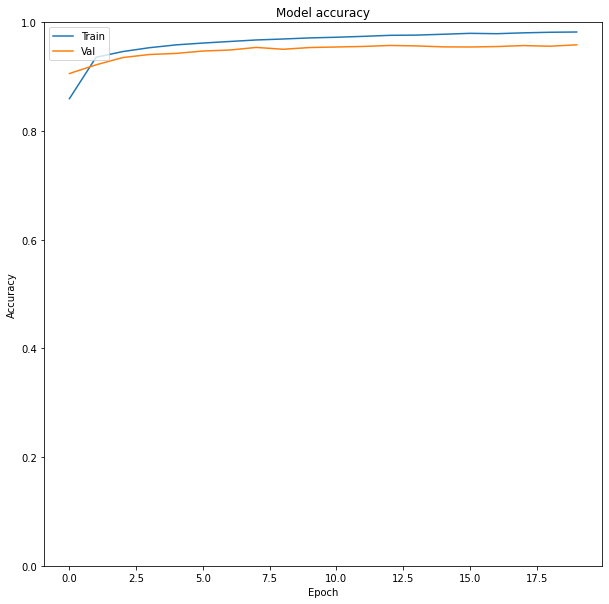

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

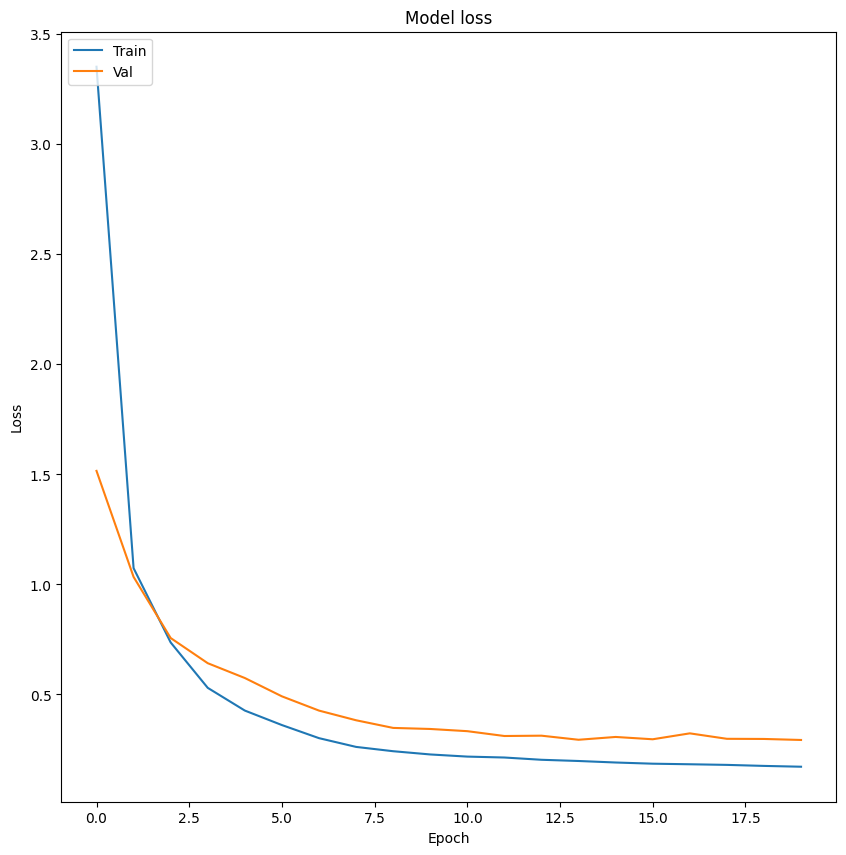

In [32]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [33]:
# Save the model
from pathlib import Path
path = Path('./models')
path.mkdir()
model.save('./models/model_2.h5')

# 5. Evaluate the model.

In [34]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.1931961476802826
Test accuracy: 0.9589999914169312


In [35]:
# Predict test samples post-process them
predicted_classes = model.predict(X_test)
# predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

157/157 [==============================] - 0s 2ms/step


In [36]:
# Convert test labels to scalars
y_test_scalar = np.argmax(y_test, axis=1)

In [37]:
# Obtain test samples correctly predicted
correct_indices = np.nonzero(predicted_classes == y_test_scalar)[0]

In [38]:
# Obtain test samples incorrectly predicted
incorrect_indices = np.nonzero(predicted_classes != y_test_scalar)[0]

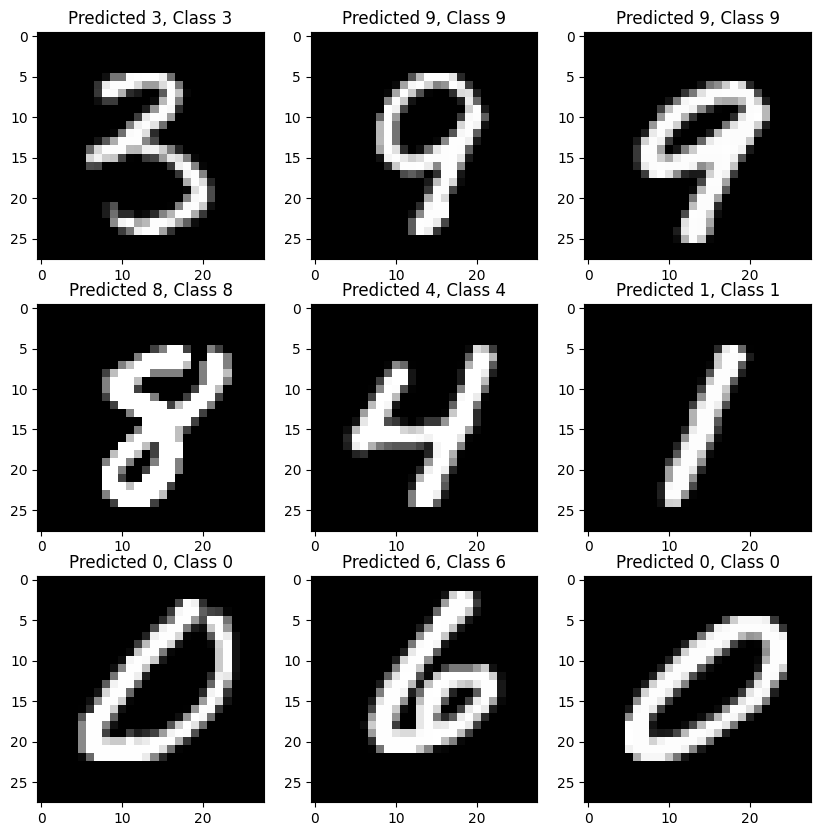

In [39]:
# Show some correctly classified samples
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', 
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], 
                                              y_test_scalar[correct]))

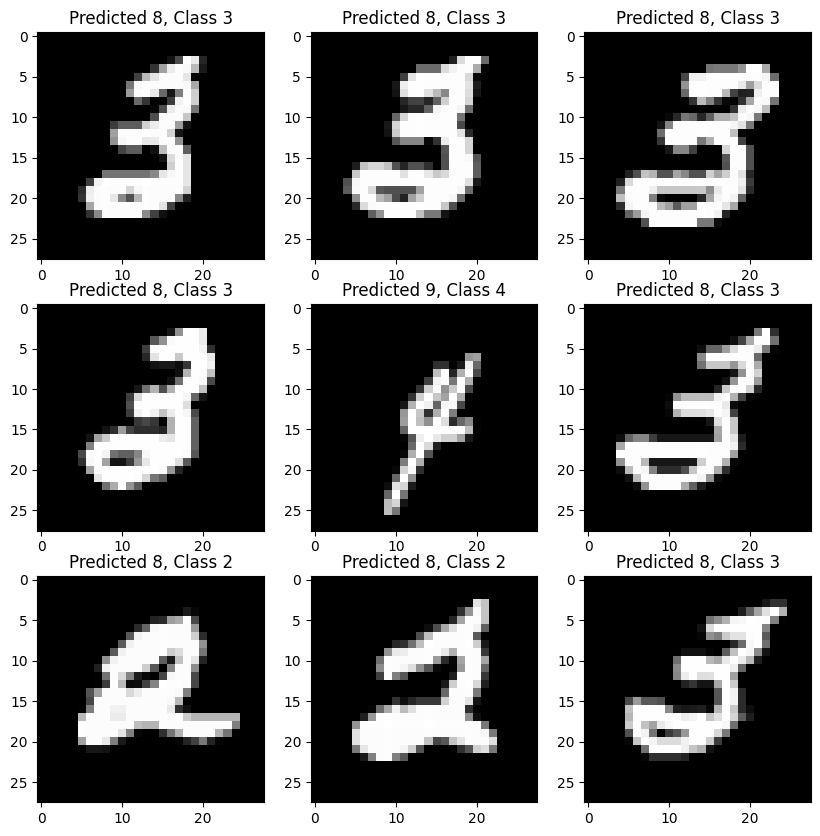

In [40]:
# Show some incorrectly classified samples
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', 
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], 
                                              y_test_scalar[incorrect]))

# Exercise 1: Create a new model with 512 neurons in the hidden layer and repeat the process

In [41]:
# Design the model

# Define the model
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer = Dense(512, activation='relu')(input_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [42]:
# Show summary of the model
# Show a summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])


In [44]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 4.1678 - accuracy: 0.9086 - val_loss: 1.2176 - val_accuracy: 0.9310
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5680 - accuracy: 0.9574 - val_loss: 0.9501 - val_accuracy: 0.9316
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3026 - accuracy: 0.9676 - val_loss: 0.6631 - val_accuracy: 0.9466
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2054 - accuracy: 0.9743 - val_loss: 0.5675 - val_accuracy: 0.9512
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1667 - accuracy: 0.9777 - val_loss: 0.5863 - val_accuracy: 0.9482
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1831 - accuracy: 0.9762 - val_loss: 0.6660 - val_accuracy: 0.9500
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1716 - accuracy: 0.9778 - val_loss: 0.6507 - val_accuracy: 0.9460
Epoch 

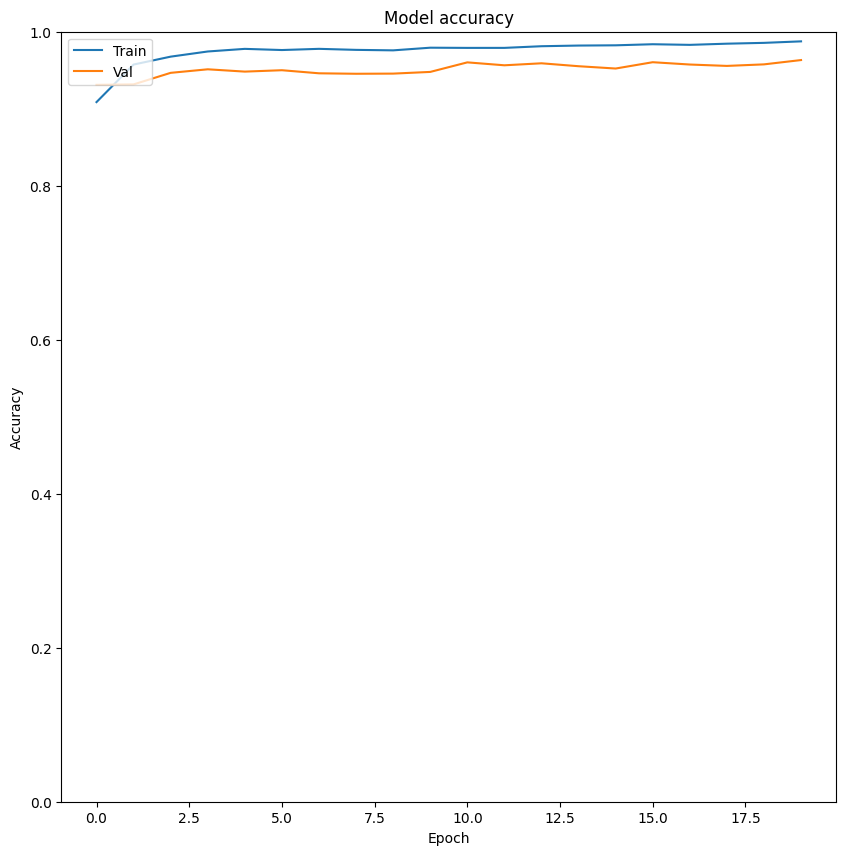

In [45]:
# Obtain metrics in the test partition

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

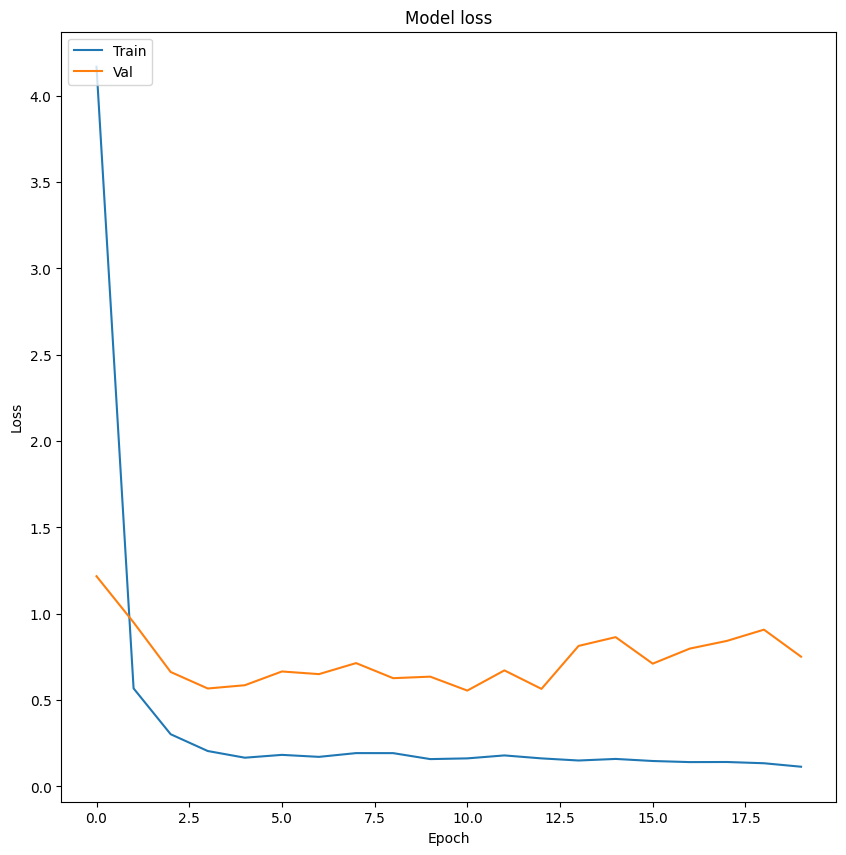

In [46]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [48]:
# Save the model
from pathlib import Path
path = Path('./models')
model.save('./models/model_3.h5')

In [49]:
# Predict test samples post-process them
predicted_classes = model.predict(X_test)
# predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

157/157 [==============================] - 0s 2ms/step


In [50]:
# Convert test labels to scalars
y_test_scalar = np.argmax(y_test, axis=1)

In [51]:
# Obtain test samples correctly predicted
correct_indices = np.nonzero(predicted_classes == y_test_scalar)[0]

In [52]:
# Obtain test samples incorrectly predicted
incorrect_indices = np.nonzero(predicted_classes != y_test_scalar)[0]

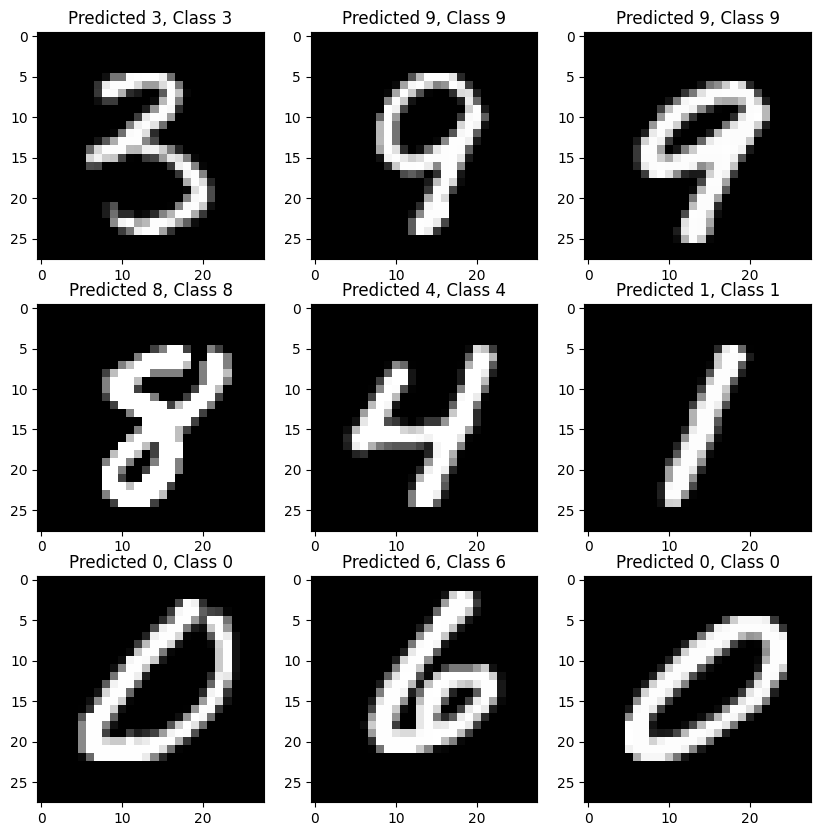

In [53]:
# Show some correctly classified samples
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', 
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], 
                                              y_test_scalar[correct]))

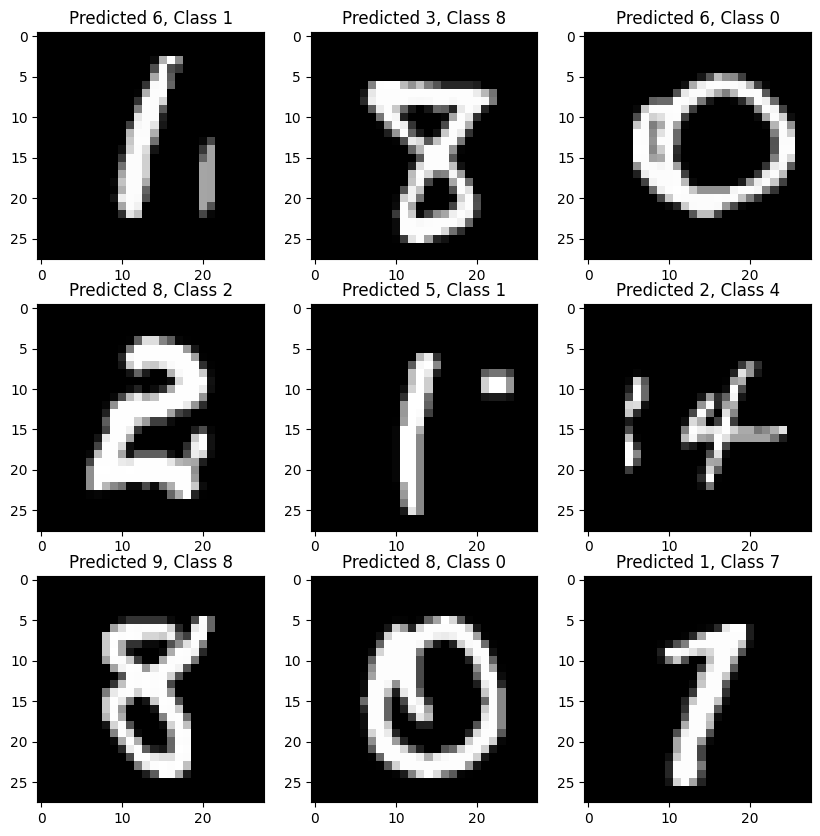

In [54]:
# Show some incorrectly classified samples
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', 
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], 
                                              y_test_scalar[incorrect]))

# Exercise 2: Add a hidden layer with 512 neurons to the model of exercise 1 and repeat the process

In [ ]:
# Design the model


In [ ]:
# Show summary of the model


In [ ]:
# Compile the model


In [ ]:
# Train the model


In [ ]:
# Obtain metrics in the test partition


# Exercise 3: Train a model with CIFAR 10 dataset

[Dataset info](https://www.cs.toronto.edu/~kriz/cifar.html)

In [ ]:
# Import dependence for downloading CIFAR10
from keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()